# Data Visualization of Exchange Rates

## Introduction

In this project, we'll **explore** and **visualize** the **euro exchange rates** over time. We'll start by loading the dataset, then proceed to clean and preprocess the data to ensure accuracy and consistentcy. 

After preparing the data, we'll create a series of visualizatons to better understand the **trends** and **patterns** in the euro's exchange rate, with a parituclar focus on its relationship with the **US dollar**.

The goal is to gain insights into how the euro has performed historically and identify any signgicant fluctuations or long-term trends.

## Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro is the official currency in most of the countries of the European Union.

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
# load the dataset
df = pd.read_csv('euro-daily-hist_1999_2022.csv')

### dataset insight

In [206]:
# get the general information about the dataset

print("*" * 100)
print("General Information about the Dataset:")
print(df.info())

print("*" * 100)
print("First 5 Rows of the Dataset:")
print(df.head())

****************************************************************************************************
General Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6785 non-null   object 
 1   [Australian dollar ]      6785 non-null   object 
 2   [Bulgarian lev ]          6383 non-null   object 
 3   [Brazilian real ]         6517 non-null   object 
 4   [Canadian dollar ]        6785 non-null   object 
 5   [Swiss franc ]            6785 non-null   object 
 6   [Chinese yuan renminbi ]  6517 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6785 non-null   object 
 9   [Danish krone ]           6785 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6785 no

From the above result, we can see that the dataset have 39 countries exchange rate, there are null values present in different columns. The data type is not consistent, some are objects and some are float, but they all represent the number.

## Dataset Cleaning

Before we start creating data visualizations, we'll need to a bit of data cleaning. 
Our focus is the exchange rate between the euro and the american dollar.

Thus, we will do the following:
- Rename the US dollar and PEriod\Unit columns to more professional names.
- Change the Period\Unit column from object to datetime datatype.
- Sort the values by time in ascending order.
- Reset the index.

In [207]:
# rename the columns for better readability
df = df.rename(columns={
    "Period\\Unit:": "Date",
    "[US dollar ]": "USD"
})

# convert the 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# sort the dataframe by date
df.sort_values(by="Date", inplace=True)

# set the 'Date' column as the index
df.set_index("Date", inplace=True)

In [208]:
df_euro_usd = df[["USD"]].copy()

In [209]:
df_euro_usd.head()

,USD
Date,
1999-01-04,1.1789
1999-01-05,1.1790
1999-01-06,1.1743
1999-01-07,1.1632
1999-01-08,1.1659


In [210]:
df_euro_usd.value_counts()

USD   
-         62
1.2276     9
1.0808     8
1.0888     8
1.1215     8
          ..
1.2459     1
1.0059     1
1.2456     1
1.2451     1
1.5990     1
Name: count, Length: 3837, dtype: int64

In [211]:
df_euro_usd = df_euro_usd[df_euro_usd["USD"] != '-']
# cast the 'USD' column to float
df_euro_usd["USD"] = df_euro_usd["USD"].astype(float)

## Rolling Mean

Now that we've finished cleaning the dataset, we can move on to the visualization section.

We will generate a line plot to visualize the evolution of the euro-dollar exchange rate.

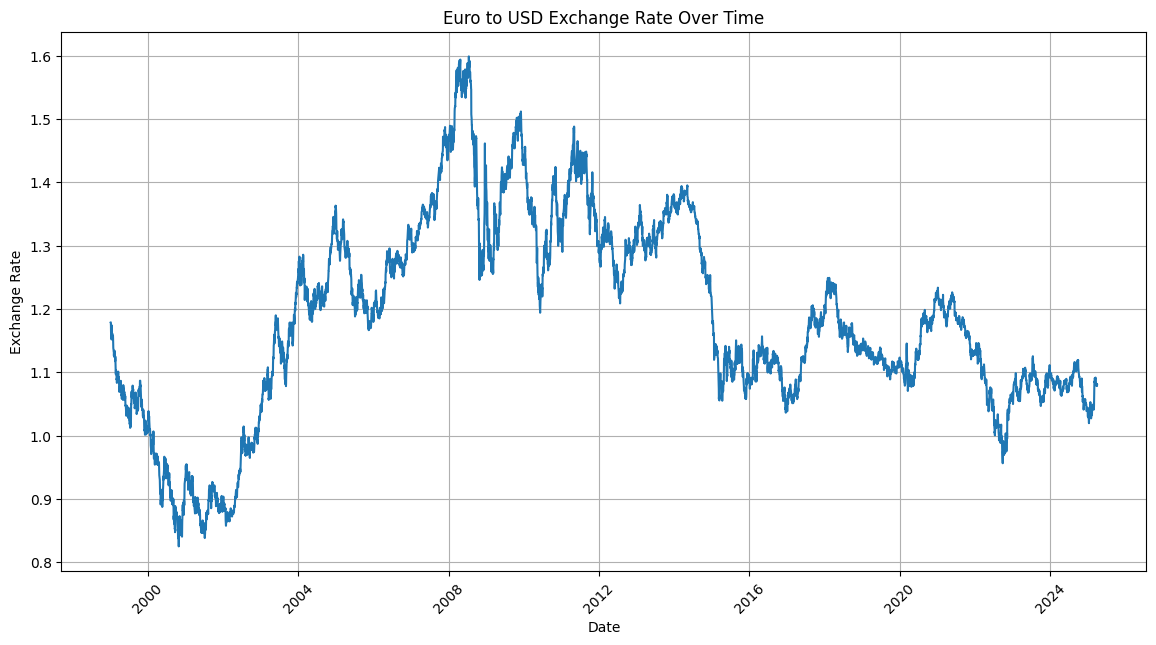

In [212]:
plt.figure(figsize=(14, 7))
plt.plot(df_euro_usd.index, df_euro_usd["USD"])
plt.title("Euro to USD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.xticks(rotation=45)
plt.grid()
plt.show()

If we look at the line's shape, we see many small wiggles - rather than seeing a smooth line. The wiggles are the daily variation i the exchange rate. The rate goes up and down, up and down again, day to day.
The rate will only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).